In [1]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

fitted alpha value: 0.1848


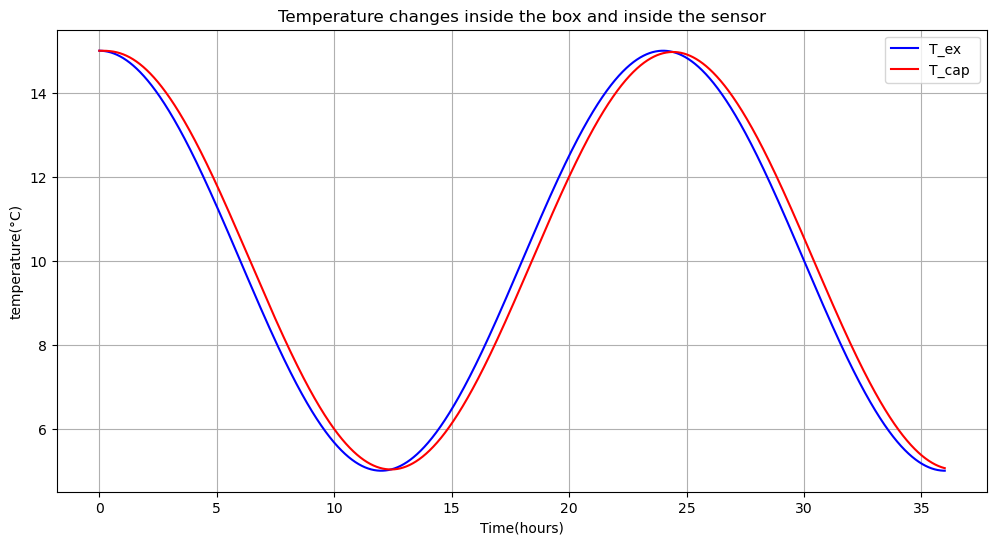

[14.970127851408243, 24.42]


In [15]:
delta_max_ex = 5 # ℃
average_T = 10
phi = 0  
alpha_initial = 0.1  
thickness = 0.004  
k_box = 50  # Thermal conductivity (W/m·K)
rho_box = 7850  
cp_box = 500  
alpha_diff = k_box / (rho_box * cp_box)  
total_time = 36  # hours
dt = 0.01 
num_steps = int(total_time / dt)
num_cells = 6  
dx = thickness / num_cells  

# check the stability
#if alpha_diff * dt / dx**2 > 0.5:
    #raise ValueError("Unstable：please change dt or dx")

T_ex = np.zeros(num_steps)  
T_in = np.zeros((num_steps, num_cells + 1))  
time = np.arange(num_steps) * dt

T_ex = delta_max_ex * np.cos(2 * np.pi * time / 24) +average_T
T_in[0, :] = T_ex[0]  
for n in range(0, num_steps - 1):
    for i in range(1, num_cells): 
        T_in[n + 1, i] = T_in[n, i] + (alpha_diff * dt / (dx**2)) * (T_in[n, i + 1] - 2 * T_in[n, i] + T_in[n, i - 1])

    T_in[n + 1, 0] = T_ex[n + 1]  # Boundary conditions
    T_in[n + 1, -1] = T_in[n + 1, -2]  
T_cap = T_in[:, num_cells // 2]  

def model_func(t, alpha_fit):
    return delta_max_ex * np.cos(2 * np.pi * t / 24 - alpha_fit * t + phi) * np.exp(-alpha_fit * t)

popt, pcov = curve_fit(model_func, time, T_cap, p0=[alpha_initial])
fitted_alpha = popt[0]

print(f"fitted alpha value: {fitted_alpha:.4f}")
plt.figure(figsize=(12, 6))
plt.plot(time, T_ex, label='T_ex ', color='blue')
plt.plot(time, T_cap, label='T_cap ', color='red')
plt.xlabel('Time(hours)')
plt.ylabel('temperature(°C)')
plt.title('Temperature changes inside the box and inside the sensor')
plt.legend()
plt.grid()
plt.show()

for i in range(1,num_steps-2):
    if T_cap[i-1] < T_cap[i]:
        if T_cap[i]>T_cap[i+1]:
            print([T_cap[i],time[i]])

fitted alpha value: 0.1849


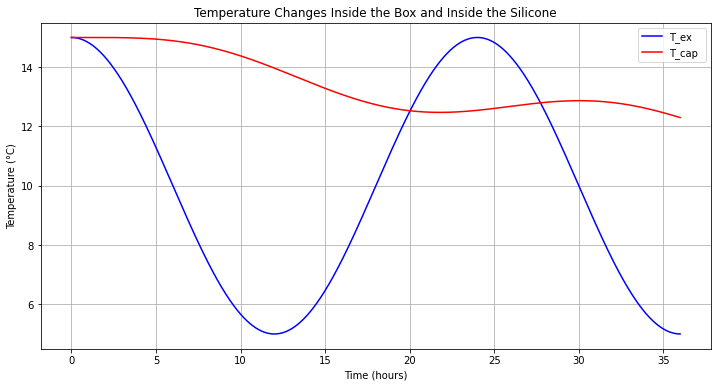

[12.868597141459164, 30.04]


In [2]:
# param mtn
delta_max_ex = 5  # ℃
average_T = 10
phi = 0  
alpha_initial = 0.1  
thickness = 0.004  
k_box = 50  # Thermal conductivity of the box (W/m·K)
rho_box = 7850  
cp_box = 500  
alpha_diff_box = k_box / (rho_box * cp_box)  

# param ajouté : Silicon
k_silicone = 0.2  # Thermal conductivity of silicone (W/m·K)
rho_silicone = 1100  # Density of silicone (kg/m³)
cp_silicone = 1500  # Specific heat capacity of silicone (J/kg·K)
alpha_diff_silicone = k_silicone / (rho_silicone * cp_silicone)

# param du temp
total_time = 36  # hours
dt = 0.01 
num_steps = int(total_time / dt)
num_cells_box = 6  # Box cells
num_cells_silicone = 4  # Silicone cells
dx_box = thickness / num_cells_box  
dx_silicone = thickness / num_cells_silicone  

# temperature
T_ex = np.zeros(num_steps)  
T_in_box = np.zeros((num_steps, num_cells_box + 1))  
T_in_silicone = np.zeros((num_steps, num_cells_silicone + 1))  
time = np.arange(num_steps) * dt

# temperature ext
T_ex = delta_max_ex * np.cos(2 * np.pi * time / 24) + average_T
T_in_box[0, :] = T_ex[0]  
T_in_silicone[0, :] = T_in_box[0, -1]  # temperature initiale

# processus de propagation
for n in range(0, num_steps - 1):
    for i in range(1, num_cells_box): 
        T_in_box[n + 1, i] = T_in_box[n, i] + (alpha_diff_box * dt / (dx_box**2)) * (T_in_box[n, i + 1] - 2 * T_in_box[n, i] + T_in_box[n, i - 1])
    
    T_in_box[n + 1, 0] = T_ex[n + 1]  # condition limite
    T_in_box[n + 1, -1] = T_in_box[n + 1, -2]  # condition limite

    for i in range(1, num_cells_silicone): 
        T_in_silicone[n + 1, i] = T_in_silicone[n, i] + (alpha_diff_silicone * dt / (dx_silicone**2)) * (T_in_silicone[n, i + 1] - 2 * T_in_silicone[n, i] + T_in_silicone[n, i - 1])
    
    T_in_silicone[n + 1, 0] = T_in_box[n + 1, -1]  # 边界条件：硅胶层的外界温度
    T_in_silicone[n + 1, -1] = T_in_silicone[n + 1, -2]  # 对流边界条件

# temperature au milieu
T_cap = T_in_silicone[:, num_cells_silicone // 2]

def model_func(t, alpha_fit):
    return delta_max_ex * np.cos(2 * np.pi * t / 24 - alpha_fit * t + phi) * np.exp(-alpha_fit * t)

popt, pcov = curve_fit(model_func, time, T_cap, p0=[alpha_initial])
fitted_alpha = popt[0]

print(f"fitted alpha value: {fitted_alpha:.4f}")

# visualisation
plt.figure(figsize=(12, 6))
plt.plot(time, T_ex, label='T_ex ', color='blue')
plt.plot(time, T_cap, label='T_cap ', color='red')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Changes Inside the Box and Inside the Silicone')
plt.legend()
plt.grid()
plt.show()

for i in range(1, num_steps - 2):
    if T_cap[i - 1] < T_cap[i] and T_cap[i] > T_cap[i + 1]:
        print([T_cap[i], time[i]])
